In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import cv2 as cv
import pandas as pd
#import pygame
from scipy.linalg import svd, diagsvd
import matplotlib.image as mpimg
from copy import deepcopy

In [2]:
def save_to_csv(k, infos):
    df = pd.read_csv('results.csv')

    df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"], 
                    'Correto': infos["Correto"], 'Diferença': infos["Diferença"], 'K': k}, ignore_index=True)
    df.to_csv('results.csv', index=False)


In [15]:
df = pd.read_csv('ratings_small.csv')
print(df.head(5))
df = df.pivot(index='userId',columns='movieId',values='rating')
df = df.replace(np.nan,0)
X = df.to_numpy()
X.shape

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205


(671, 9066)

In [3]:
def comprimir (u, s, vt, K):
    """Remove elementos de u, s e vt deixando somente K componentes restantes
    """ 
    u_ = u[:,:K]
    s_ = s[:K]
    vt_ = vt[:K,:]

    return u_, s_, vt_

In [13]:
X[0,30]

2.5

In [6]:
rating = np.random.randint(1,6)
print(rating)
i = 0
j = 30

Y = deepcopy(X)
Y[i,j] = rating
X[i,j]

1


2.5

In [16]:
def predict(arr,k):
    u0, s0, vt0 = svd(arr)
    u1,s1,vt1 = comprimir(u0,s0,vt0,k)
    # u1,s1,vt1 = u0,s0,vt0
    sigma = diagsvd(s1, u1.shape[1], vt1.shape[0])
    Y = u1 @ sigma @ vt1
    Y = np.around(Y,5)
    return Y

In [8]:
u,s,vt = svd(X)

In [9]:
s

array([517.58313979, 243.76943485, 204.30617832, 162.47028777,
       156.30956977, 145.23455301, 136.81751883, 122.99256885,
       118.74152381, 116.32873458, 111.49367292, 105.79872672,
       105.22888405,  99.23143457,  97.28551406,  92.94461751,
        92.03785085,  91.66845354,  89.86862678,  88.6199206 ,
        87.28696703,  85.49577203,  84.4018213 ,  84.04184504,
        82.09439136,  81.97690614,  80.3072336 ,  79.9572191 ,
        79.22060121,  78.765595  ,  77.93137263,  77.41399697,
        76.41535328,  75.16819208,  75.00607014,  74.52580718,
        73.92886524,  73.18212044,  72.6081443 ,  72.37594771,
        71.83632747,  71.53824808,  71.15108016,  70.79173171,
        70.47873043,  69.36059605,  68.88086787,  68.46729698,
        67.902172  ,  67.70890378,  67.55712063,  66.9415601 ,
        66.7623694 ,  66.11353385,  65.77593494,  65.09363441,
        64.64400521,  64.32314536,  64.0518851 ,  64.01358834,
        63.5865328 ,  63.17365423,  62.47363085,  61.90

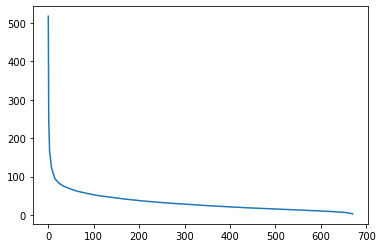

In [10]:
plt.figure()
plt.plot(s)
plt.show()

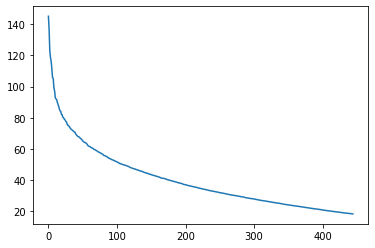

In [11]:
plt.figure()
plt.plot(s[5:450])
plt.show()

In [12]:
k = np.random.randint(0,X.shape[1])
print(k)
Y = predict(Y,k)
Y[i,j]

2470


1.0

In [13]:
X[i,j]

2.5

In [14]:
from tqdm import tqdm
for n in tqdm(range(1,11)):

    d = dict()

    rating = np.random.randint(1,6)

    i = 0
    j = 30

    Y = deepcopy(X)
    Y[i,j] = rating

    k = 50*n

    Y = predict(Y,k)
    d['Aleatório'] = rating
    d['Estimado'] = Y[i,j]
    d['Correto'] = X[i,j]
    d['Diferença'] = Y[i,j]-X[i,j]
    d['K'] = k
    save_to_csv(k, d)


  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\jalfr\AppData\Local\Temp\ipykernel_31296\885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
 10%|█         | 1/10 [00:09<01:22,  9.20s/it]C:\Users\jalfr\AppData\Local\Temp\ipykernel_31296\885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
 20%|██        | 2/10 [00:18<01:11,  8.97s/it]C:\Users\jalfr\AppData\Local\Temp\ipykernel_31296\885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
 30%|███       | 3/10 [00:2

[{'Aleatório': 1,
  'Estimado': -0.01739,
  'Correto': 2.5,
  'Diferença': -2.51739,
  'K': 50},
 {'Aleatório': 1,
  'Estimado': -0.03199,
  'Correto': 2.5,
  'Diferença': -2.53199,
  'K': 100},
 {'Aleatório': 5,
  'Estimado': 0.18883,
  'Correto': 2.5,
  'Diferença': -2.31117,
  'K': 150},
 {'Aleatório': 1,
  'Estimado': 0.02519,
  'Correto': 2.5,
  'Diferença': -2.47481,
  'K': 200},
 {'Aleatório': 3,
  'Estimado': 0.34781,
  'Correto': 2.5,
  'Diferença': -2.15219,
  'K': 250},
 {'Aleatório': 1,
  'Estimado': 0.26393,
  'Correto': 2.5,
  'Diferença': -2.23607,
  'K': 300},
 {'Aleatório': 3,
  'Estimado': 0.85356,
  'Correto': 2.5,
  'Diferença': -1.6464400000000001,
  'K': 350},
 {'Aleatório': 3,
  'Estimado': 1.44878,
  'Correto': 2.5,
  'Diferença': -1.05122,
  'K': 400},
 {'Aleatório': 5,
  'Estimado': 2.95665,
  'Correto': 2.5,
  'Diferença': 0.4566499999999998,
  'K': 450},
 {'Aleatório': 1,
  'Estimado': 1.31262,
  'Correto': 2.5,
  'Diferença': -1.18738,
  'K': 500}]

In [41]:
d = dict()

rating = np.random.randint(1,6)

i = 0
j = 30

Y = deepcopy(X)
Y[i,j] = rating

k = 400

Y = predict(Y,k)
d['Aleatório'] = rating
d['Estimado'] = Y[i,j]
d['Correto'] = X[i,j]
d['Diferença'] = Y[i,j]-X[i,j]
d['K'] = k
d

{'Aleatório': 4,
 'Estimado': 1.82957,
 'Correto': 2.5,
 'Diferença': -0.6704300000000001,
 'K': 400}

In [15]:
from tqdm import tqdm
for n in tqdm(range(1,101)):

    d = dict()

    rating = np.random.randint(1,6)

    i = 0
    j = 30

    Y = deepcopy(X)
    Y[i,j] = rating

    k = 350+n

    Y = predict(Y,k)
    d['Aleatório'] = rating
    d['Estimado'] = Y[i,j]
    d['Correto'] = X[i,j]
    d['Diferença'] = Y[i,j]-X[i,j]
    d['K'] = k
    save_to_csv(k, d)



  0%|          | 0/100 [00:00<?, ?it/s]C:\Users\jalfr\AppData\Local\Temp\ipykernel_31296\885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  1%|          | 1/100 [00:09<15:03,  9.13s/it]C:\Users\jalfr\AppData\Local\Temp\ipykernel_31296\885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  2%|▏         | 2/100 [00:18<15:09,  9.28s/it]C:\Users\jalfr\AppData\Local\Temp\ipykernel_31296\885583095.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  3%|▎         | 3/100 [

[{'Aleatório': 4,
  'Estimado': 1.12631,
  'Correto': 2.5,
  'Diferença': -1.37369,
  'K': 351},
 {'Aleatório': 3,
  'Estimado': 0.86173,
  'Correto': 2.5,
  'Diferença': -1.63827,
  'K': 352},
 {'Aleatório': 3,
  'Estimado': 0.86279,
  'Correto': 2.5,
  'Diferença': -1.63721,
  'K': 353},
 {'Aleatório': 4,
  'Estimado': 1.13794,
  'Correto': 2.5,
  'Diferença': -1.36206,
  'K': 354},
 {'Aleatório': 5,
  'Estimado': 1.43755,
  'Correto': 2.5,
  'Diferença': -1.06245,
  'K': 355},
 {'Aleatório': 1,
  'Estimado': 0.37612,
  'Correto': 2.5,
  'Diferença': -2.1238799999999998,
  'K': 356},
 {'Aleatório': 3,
  'Estimado': 0.88313,
  'Correto': 2.5,
  'Diferença': -1.61687,
  'K': 357},
 {'Aleatório': 5,
  'Estimado': 1.45025,
  'Correto': 2.5,
  'Diferença': -1.04975,
  'K': 358},
 {'Aleatório': 3,
  'Estimado': 0.88281,
  'Correto': 2.5,
  'Diferença': -1.61719,
  'K': 359},
 {'Aleatório': 1,
  'Estimado': 0.38793,
  'Correto': 2.5,
  'Diferença': -2.11207,
  'K': 360},
 {'Aleatório': 2,
 

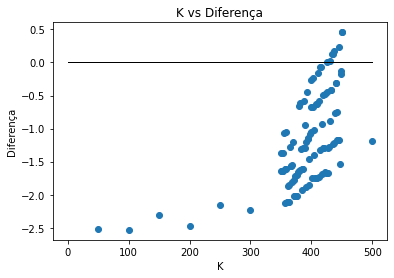

In [16]:

df = pd.read_csv('results.csv')
plt.plot([0, 500], [0, 0], color='black', linestyle='-', linewidth=1)
plt.title('K vs Diferença')
plt.xlabel('K')
plt.ylabel('Diferença')
plt.scatter(df['K'], df['Diferença'])
plt.show()


In [52]:
def CSV(k, infos, csv):
    df = pd.read_csv(csv)

    df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"], 
                    'Correto': infos["Correto"], 'Diferença': infos["Diferença"], 'K': k}, ignore_index=True)
    df.to_csv(csv, index=False)

# Teste da Função CSV modificada

In [24]:
d = dict()

rating = np.random.randint(1,6)

i = 0
j = 30

Y = deepcopy(X)
Y[i,j] = rating

k = 400

Y = predict(Y,k)
d['Aleatório'] = rating
d['Estimado'] = Y[i,j]
d['Correto'] = X[i,j]
d['Diferença'] = Y[i,j]-X[i,j]
d['K'] = k
CSV(k, d, 'total.csv')

C:\Users\jalfr\AppData\Local\Temp\ipykernel_26480\409494104.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],


# Valor Substituído Estático

Um valor original $V_{ij}$ se mantém o mesmo, o que muda é o valor que o subtitui e o K da vez. 

In [53]:
from tqdm import tqdm
for n in tqdm(range(0,672)):

    d = dict()

    rating = np.random.randint(1,6)

    i = 0
    j = 30

    Y = deepcopy(X)
    Y[i,j] = rating

    k = n

    Y = predict(Y,k)
    d['Aleatório'] = rating
    d['Estimado'] = Y[i,j]
    d['Correto'] = X[i,j]
    d['Diferença'] = Y[i,j]-X[i,j]
    d['K'] = k
    CSV(k, d, 'total.csv')

  0%|          | 0/672 [00:00<?, ?it/s]C:\Users\jalfr\AppData\Local\Temp\ipykernel_26480\409494104.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  0%|          | 1/672 [00:08<1:38:42,  8.83s/it]C:\Users\jalfr\AppData\Local\Temp\ipykernel_26480\409494104.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  0%|          | 2/672 [00:20<1:59:07, 10.67s/it]C:\Users\jalfr\AppData\Local\Temp\ipykernel_26480\409494104.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  0%|          | 3/6

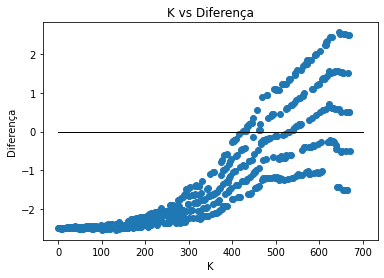

In [68]:
df_total = pd.read_csv('total.csv')
plt.plot([0, 700], [0, 0], color='black', linestyle='-', linewidth=1)
plt.title('K vs Diferença')
plt.xlabel('K')
plt.ylabel('Diferença')
plt.scatter(df_total['K'], df_total['Diferença'])
plt.show()

# Valor Substituído Aleatório

Um valor original $V_{ij}$ é escolhido aleatoriamente, assim como o valor que o subtitui e o K da vez. 

In [55]:
from tqdm import tqdm
for n in tqdm(range(0,672)):

    d = dict()

    rating = np.random.randint(1,6)

    i = np.random.randint(X.shape[0])
    j = np.random.randint(X.shape[1])

    Y = deepcopy(X)
    Y[i,j] = rating

    k = n

    Y = predict(Y,k)
    d['Aleatório'] = rating
    d['Estimado'] = Y[i,j]
    d['Correto'] = X[i,j]
    d['Diferença'] = Y[i,j]-X[i,j]
    d['K'] = k
    CSV(k, d, "totalAleatorio.csv")

  0%|          | 0/672 [00:00<?, ?it/s]C:\Users\jalfr\AppData\Local\Temp\ipykernel_26480\409494104.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  0%|          | 1/672 [00:09<1:43:14,  9.23s/it]C:\Users\jalfr\AppData\Local\Temp\ipykernel_26480\409494104.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  0%|          | 2/672 [00:18<1:44:59,  9.40s/it]C:\Users\jalfr\AppData\Local\Temp\ipykernel_26480\409494104.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Aleatório': infos["Aleatório"], 'Estimado': infos["Estimado"],
  0%|          | 3/6

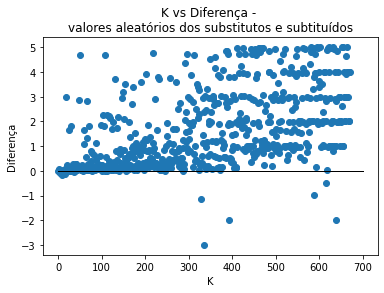

In [65]:
df_aleatorio = pd.read_csv('totalAleatorio.csv')
plt.plot([0, 700], [0, 0], color='black', linestyle='-', linewidth=1)
plt.title('''K vs Diferença - 
valores aleatórios dos substitutos e subtituídos''')
plt.xlabel('K')
plt.ylabel('Diferença')
plt.scatter(df_aleatorio['K'], df_aleatorio['Diferença'])
plt.show()

(671, 5)


C:\Users\jalfr\AppData\Local\Temp\ipykernel_26480\1552204004.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_diferentes = df[filtro]


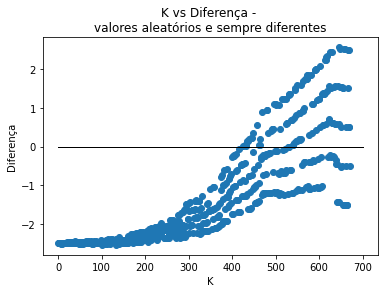

In [69]:
filtro = df_aleatorio["Aleatório"]!=df_aleatorio['Correto']
df_diferentes = df[filtro]
print(df_diferentes.shape)
plt.plot([0, 700], [0, 0], color='black', linestyle='-', linewidth=1)
plt.title('''K vs Diferença - 
valores aleatórios e sempre diferentes''')
plt.xlabel('K')
plt.ylabel('Diferença')
plt.scatter(df_diferentes['K'], df_diferentes['Diferença'])
plt.show()

C:\Users\jalfr\AppData\Local\Temp\ipykernel_26480\1031837073.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iguais = df[filtro]


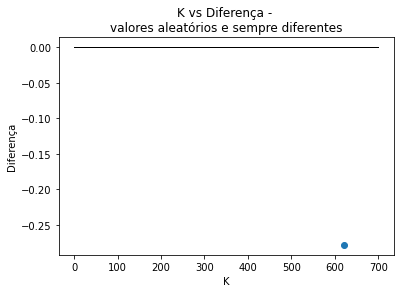

In [67]:
filtro = df_aleatorio["Aleatório"]==df_aleatorio['Correto']
df_iguais = df[filtro]
plt.plot([0, 700], [0, 0], color='black', linestyle='-', linewidth=1)
plt.title('''K vs Diferença - 
valores aleatórios e sempre iguais''')
plt.xlabel('K')
plt.ylabel('Diferença')
plt.scatter(df_iguais['K'], df_iguais['Diferença'])
plt.show()